# Agrupamento: Limite de Crédito
Aplicando algoritmo Kmeans para analisar e agrupar os registros de uma base de dados.

## Importando Bibliotecas

In [1]:
# Leitura da base de dados
import pandas as pd

# Kmeans
from sklearn.cluster import KMeans

# Colocar os Dados na mesma escala
from sklearn.preprocessing import StandardScaler

# Biblioteca para Gráficos
import matplotlib.pyplot as plt

import numpy as np

In [2]:
base = pd.read_csv('credit_card_clients.csv', header=1)

In [3]:
base.head() # Observando os 5 primeiros registros

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Tamanho da Dívida
A Base de Dados contém algumas colunas com o BILL_AMT, elas mostram o tamanho da dívida(Bill Amout) do cliente ao longo de alguns meses(April-September).  
Vou usar esses dados todos como um só, por isso vou reunir o seu somatório numa nova coluna chamada BILL_TOTAL.

In [4]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6'] 

In [5]:
base.head() # Veja a última coluna na direita --->

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,101653
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,231334
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,109339


## Escalonamento dos Dados
Separando os atributos que serão usados e colocando em escala.

In [6]:
X = base.iloc[:,[1,25]].values

# StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
#Exibindo alguns dos valores, agora em escala
X

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

# Quantos Clusters(Centróides) Usar?
Vou usar a métrica de **WCSS** para saber quantos grupos se encaixariam bem nessa base de dados.

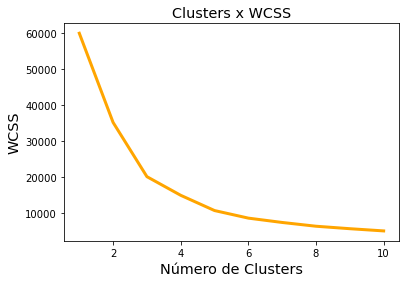

In [8]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss, c='orange', linewidth=3)
plt.title('Clusters x WCSS', fontsize='x-large')
plt.xlabel('Número de Clusters', fontsize='x-large')
plt.ylabel('WCSS', fontsize='x-large')
plt.show()

A partir de 4 clusters a diferença do WCSS(Within Cluster Sum of Squares) passa a ser relativamente baixa. Vou escolher 4 como número de clusters, mas outras opções poderiam ser usadas.

# Kmeans() e Agrupando Registros

In [9]:
kmeans = KMeans(n_clusters=4, random_state=0)
previsoes = kmeans.fit_predict(X)

A variavel previsoes armazena em qual grupo cada registro foi colocado. Sabendo que n_clusters=4 então existem 4 grupos: 0,1,2 e 3.

# Gráfico

A variavel X possui duas colunas(0,1).  
- Na coluna 0 estão os limites de crédito dos clientes.  
- Enquanto que na coluna 1 estão os somatórios das dívidas(bill_amount).

Então vamos colocar os grupos no gráfico da seguinte forma:  

**Grupo 0:**  
- Eixo X ->  X[previsoes==0,0] = Todas as linhas(registros) onde a previsão = 0, coluna 0  
- Eixo Y ->  X[previsoes==0,1] = Todas as linhas(registros) onde a previsão = 0, coluna 1  

E assim por diante..

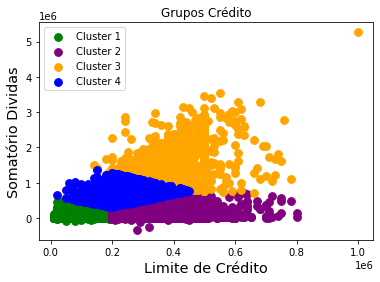

In [10]:
# Retornando os valores para escala original
X = scaler.inverse_transform(X)

plt.scatter(X[previsoes==0,0], X[previsoes==0,1], s=60, color='green', label='Cluster 1') # Grupo 0
plt.scatter(X[previsoes==1,0], X[previsoes==1,1], s=60, color='purple', label='Cluster 2') # Grupo 1
plt.scatter(X[previsoes==2,0], X[previsoes==2,1], s=60, color='orange', label='Cluster 3') # Grupo 2
plt.scatter(X[previsoes==3,0], X[previsoes==3,1], s=60, color='blue', label='Cluster 4') # Grupo 3

plt.xlabel('Limite de Crédito', fontsize='x-large')
plt.ylabel('Somatório Dividas', fontsize='x-large')
plt.title('Grupos Crédito')

plt.legend()
plt.show()

# Conclusão
Usar apenas dois atributos facilita a visualização através do gráfico. Porém, testar novamente com mais atributos(colunas) da base de dados pode formar grupos mais consistentes e próximos da realidade, juntando por exemplo, pessoas com idade,sexo, e nível de educação semelhantes.  
Além disso, é sempre possivel aumentar ou diminui o número de clusters de acordo com a necessidade.

# Fonte
Baixei a base de dados através do curso: Machine Learning e Data Science com Python de A à Z do https://iaexpert.academy/

Mas também achei ela disponivel em: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#  
Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.